In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Sinusoids

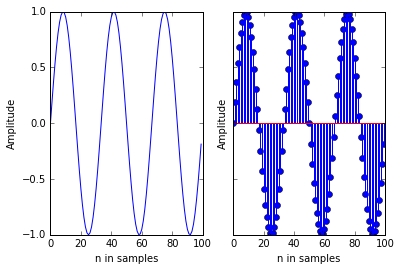

In [9]:
Fs = 100
n = np.arange(Fs*1)
alpha = 0.05
phi = 0
F = 3.
s = np.sin(2. * np.pi * F * n / Fs + phi) #* np.exp(-alpha * n)
omega = 2. * np.pi * F/ Fs
s1 = (np.exp(omega*n*1j) - np.exp(-omega*n*1j) ) / 2j
f, a = plt.subplots(1, 2, sharey=True, sharex=True)
a[0].plot(n,s)
a[0].set_xlabel("n in samples")
a[0].set_ylabel("Amplitude")
a[1].stem(n,s1.real)
a[1].set_xlabel("n in samples")
a[1].set_ylabel("Amplitude")

# Features

In [10]:
energy = np.dot(s, s)
print energy
rms = np.sqrt(energy/len(s))
print rms

50.0
0.707106781187


# FFT

In [154]:
s2 = 0.7 * np.sin(2. * np.pi * 2. * n / Fs)\
+ 0.3 * np.sin(2. * np.pi * 10. * n / Fs)\
# + 0.2 * np.random.normal(0.9)

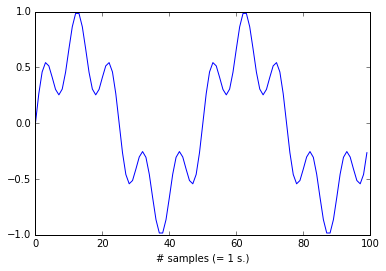

In [127]:
plt.plot(n, s2)
plt.xlabel("# samples (= 1 s.)")

51


<Container object of 3 artists>

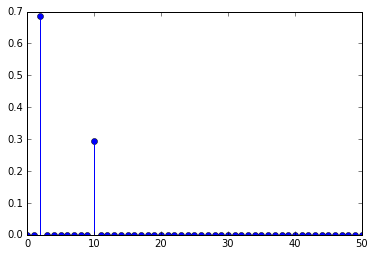

In [133]:
# by default fft is size of signal
f = np.fft.rfft(s2)
ft = f /(len(f))
print len(ft)
plt.stem(abs(ft))

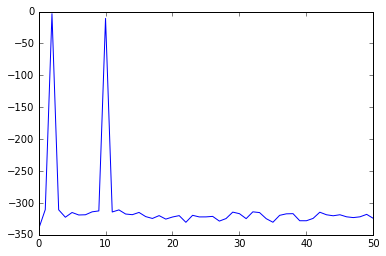

In [134]:
    plt.plot(20*np.log10(abs(ft)))

In [135]:
# amplitude of peaks
ft[abs(ft) > 0.2]
# index of peaks
np.where(abs(ft) > 0.2)

(array([ 2, 10]),)

65


<Container object of 3 artists>

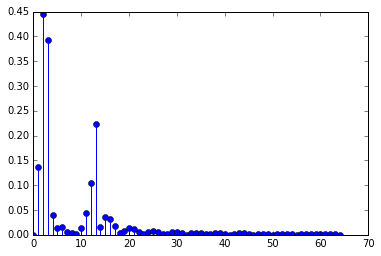

In [138]:
# if n_fft > n_signal np.fft zero pad automatically => better resolution
f = np.fft.rfft(s2, n=128)
ft = f /(len(f))
print len(f)
plt.stem(abs(ft))

In [54]:
def peak_detection(mX, t):
    """
    Detect spectral peak locations
    mX: magnitude spectrum, t: threshold
    returns ploc: peak locations
    """

    thresh = np.where(mX[1:-1]>t, mX[1:-1], 0);             # locations above threshold
    next_minor = np.where(mX[1:-1]>mX[2:], mX[1:-1], 0)     # locations higher than the next one
    prev_minor = np.where(mX[1:-1]>mX[:-2], mX[1:-1], 0)    # locations higher than the previous one
    ploc = thresh * next_minor * prev_minor                 # locations fulfilling the three criteria
    ploc = ploc.nonzero()[0] + 1                            # add 1 to compensate for previous steps
    return ploc

In [139]:
ploc = peak_detection(ft, 0.1)

In [140]:
print ploc

[2]


# FIR

In [146]:
def convolution(x, coef):
    y = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(coef)):
            y[i] += coef[j] * x[i-j]
    return y

In [152]:
a = [0.32590173795979338000, 0.34819652408041324000,0.32590173795979338000]
y = convolution(s2, a)
# filtered
fy = np.fft.rfft(y)
fyt = fy /(len(y))
# original
f = np.fft.rfft(s2)
ft = f /(len(f))

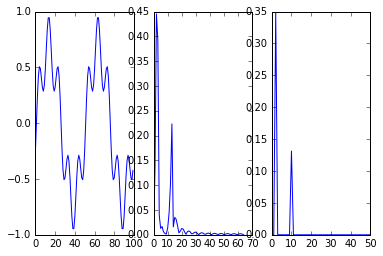

In [155]:
fig, axes = plt.subplots(1, 3)
axes[0].plot(y)
axes[1].plot(abs(ft))
axes[2].plot(abs(fyt))
